# \[Week3] 텍스트분석 기초

## 1. 텍스트 분석 기본 용어 정리
https://wikidocs.net/21694  
위의 링크와 구글링으로 정리  
용어 정리는 추후에 본인이 보기에 편한 형식으로 정리하면 됩니다.

1. 토큰화 (Tokenization)  
\[답변] 주어진 문장, corpus를 token이라는 단위로 나누는 작업. token은 상황에 따라 기준이 달라진다. word, sentence, 등등. 한국어의 경우 형태소가 중요하다. NLTK는 영어 corpus tokenization에 사용한다. 한국어는 KoNLPY를 사용한다. 

2. 불용어 (Stopword)  
\[답변] 큰 의미가 없는 token

3. 정규표현식 (Regular Expression) 문법  

1) 정규 표현식에 해당하는 스트링 2개 이상  
(1) a+  
\[답변] a, aa, aaaaaaaaaaaaa
<br>
(2) a{3}b{2,}  
\[답변] aaabb, aaabbbbbbbbbbbbbbbbbbbb
<br>
(3) .+b$  
\[답변] kkb, nb, dfb
<br>
(4) ^ab*     
\[답변] a, ab, abdflskejf
<br>
(5) \[a-z]+\[^a|z]  
\[답변] cb, cdb, xsz, xssafaefz

In [25]:
import re
r = re.compile("[a-z]+[^a|z]")
r.search("xssafaefz")

<re.Match object; span=(0, 8), match='xssafaef'>

2) 정규 표현식 문자 규칙 의미  
(1) \\\ \[답변] \문자
<br>
(2) \d \[답변] 모든 숫자. [0-9]
<br>
(3) \D \[답변] 숫자 제외 모든 문자. [^0-9]
<br>
(4) \s \[답변] 공백. [ \t\n\r\f\v]
<br>
(5) \S \[답변] 공백 제외 모든 문자. [^ \t\n\r\f\v]
<br>
(6) \w \[답변] 문자 또는 숫자. [a-zA-Z0-9]
<br>
(7) \W \[답변] (문자 또는 숫자) 제외 문자. [^a-zA-Z0-9]

3) 정규표현식 모듈 함수 사용

(1) 출력 결과 : \['010', '1234', '1234', '30']

In [26]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여""" 
re.findall("\d+", text)

['010', '1234', '5678', '25']

(2) 출력 결과 : \['1234', '5678']

In [27]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여"""  
re.findall("\d{4}", text)

['1234', '5678']

(3) 출력 결과 : \['John', 'James', 'Noonsong'] 

In [30]:
import re
text = """100 John    PROF
101 James   STUD
102 Noonsong   STUD""" 
re.findall("[A-Z][a-z]+", text)

['John', 'James', 'Noonsong']

4. 정수 인코딩(Integer Encoding)  

1) 문장 분리 및 토큰화

In [2]:
# 이 셀은 실행만 시키면 됩니다.
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."
# 문장 분리
sentences = text.replace("!", ".").split(". ")
# 토큰화
tokenized = [sentence.lower().split() for sentence in sentences]

In [3]:
sentences

['A barber is a person',
 'a barber is good person',
 'a barber is huge person',
 'he Knew A Secret',
 'The Secret He Kept is huge secret',
 'Huge secret',
 'His barber kept his word',
 'a barber kept his word',
 'His barber kept his secret',
 'But keeping and keeping such a huge secret to himself was driving the barber crazy',
 'the barber went up a huge mountain.']

In [4]:
tokenized

[['a', 'barber', 'is', 'a', 'person'],
 ['a', 'barber', 'is', 'good', 'person'],
 ['a', 'barber', 'is', 'huge', 'person'],
 ['he', 'knew', 'a', 'secret'],
 ['the', 'secret', 'he', 'kept', 'is', 'huge', 'secret'],
 ['huge', 'secret'],
 ['his', 'barber', 'kept', 'his', 'word'],
 ['a', 'barber', 'kept', 'his', 'word'],
 ['his', 'barber', 'kept', 'his', 'secret'],
 ['but',
  'keeping',
  'and',
  'keeping',
  'such',
  'a',
  'huge',
  'secret',
  'to',
  'himself',
  'was',
  'driving',
  'the',
  'barber',
  'crazy'],
 ['the', 'barber', 'went', 'up', 'a', 'huge', 'mountain.']]

2) 각 단어에 대한 빈도수 딕셔너리 저장  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]

In [9]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usersilsoo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# 각 단어에 대한 빈도수 딕셔너리로 저장 
# *stopword는 제거
from nltk.corpus import stopwords
vocab = {}
stop_words = set(stopwords.words('english'))
sentences = []      # stopword 제거된 토큰화된 문장 리스트 저장
# 여기부터 코드 작성
for sentence in tokenized:
    result = []
    for word in sentence:
        if word not in stop_words:
            result.append(word)
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1
    sentences.append(result)
    
# 빈도수 높은 순으로 정렬
# 여기부터 코드 작성
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]


In [4]:
sentences

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain.']]

3) 빈도순으로 정렬된 단어에 정수 인덱스 부여  
\[출력] {'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13, 'OOV' : 14}

In [5]:
word_to_index = {}
i = 1
# 여기부터 코드 작성
for (word, frequency) in vocab_sorted:
    word_to_index[word] = i
    i += 1
# dictionary에 없는 단어
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain.': 13, 'OOV': 14}


4) word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩  
\[출력] \[\[1, 5], \[1, 8, 5], \[1, 3, 5], \[9, 2], \[2, 4, 3, 2], \[3, 2], \[1, 4, 6], \[1, 4, 6], \[1, 4, 2], \[7, 7, 3, 2, 10, 1, 11], \[1, 12, 3, 13]]

In [6]:
encoded = []
# 여기부터 코드 작성
for sentence in sentences:
    temp = []
    for token in sentence:
        try:
            temp.append(word_to_index[token])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


5. 패딩(Padding)  
0으로 패딩해보기

1) 가장 긴 문장 길이 찾기

In [9]:
max_len = max(len(item) for item in encoded) # 가장 긴 문장 길이 찾기
print(max_len)

7


2) 가장 긴 문장 길이에 맞춰 0으로 채워넣기  
\[\[ 1  5  0  0  0  0  0]  
 \[ 1  8  5  0  0  0  0]  
 \[ 1  3  5  0  0  0  0]  
 \[ 9  2  0  0  0  0  0]  
 \[ 2  4  3  2  0  0  0]  
 \[ 3  2  0  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  2  0  0  0  0]  
 \[ 7  7  3  2 10  1 11]  
 \[ 1 12  3 13  0  0  0]]

In [11]:
import numpy as np
for sentence in encoded:
    # 코드 작성
    while len(sentence) < max_len:
        sentence.append(0)

encoded = np.array(encoded)        # 지금은 보기 좋게 하기 위함임..
print(encoded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


6. 원-핫 인코딩(One-Hot Encoding)  
\[출력] \[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
def one_hot_encoding(word, word_to_index):
    # 코드 작성
    one_hot_vector = [0] * len(word_to_index)
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [13]:
# 위의 함수와 정수 인코딩 실행 후 실행할 것.
one_hot_encoding("huge", word_to_index)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7. Bag of Words(BoW)  
\[답변] 단어 출현 frequency를 저장한 단어 가방. 각 단어에 정수 인덱스를 부여하고 각 인덱스 위치에 token 등장 횟수를 기록한다. 

## 2. 텍스트 분석 전처리 경험해보기

1. 본인이 좋아하는 노래 가사, 시 등 text에 저장

In [55]:
LoveIsAnOpenDoor = " Okay can I just say something crazy I love crazy All my life has been a series of doors in my face And then suddenly I bump into you I was thinking the same thing ‘Cause like I've been searching my whole life to find my own place And maybe it's the party talking or the chocolate fondue But with you But with you I found my place I see your face And it's nothing like I've ever known before Love is an open door Love is an open door Love is an open door With you With you With you With you Love is an open door I mean it's crazy What We finish each other's Sandwiches That's what I was gonna say I've never met someone Who thinks so much like me Jinx Jinx again Our mental synchronization Can have but one explanation You And I Were Just Meant to be Say goodbye Say goodbye To the pain of the past We don't have to feel it any more Love is an open door Love is an open door Life can be so much more With you With you With you With you Love is an open door Can I say something crazy Will you marry me Can I say something even crazier Yes"
ForTheFirstTimeInForever = " The window is open So's that door I didn't know they did that anymore Who knew we owned eight thousand salad plates For years I've roamed these empty halls Why have a ballroom with no balls Finally they're opening up the gates There'll be actual real live people It'll be totally strange wow Am I so ready for this change 'Cause for the first time in forever There'll be music there'll be light For the first time in forever I'll be dancing through the night Don't know if I'm elated or gassy But I'm somewhere in that zone Cause for the first time in forever I won't be alone I can't wait to meet everyone What if I meet the one Tonight imagine me gown and all Fetchingly draped against the wall The picture of sophisticated grace Ooh I suddenly see him standing there A beautiful stranger tall and fair I wanna stuff some chocolate in my face But then we laugh and talk all evening Which is totally bizarre Nothing like the life I've lead so far For the first time in forever There'll be magic there'll be fun For the first time in forever I could be noticed by someone And I know it is totally crazy To dream I'd find romance But for the first time in forever At least I've got a chance Don't let them in Don't let them see Be the good girl You always have to be Conceal Don't feel Put on a show Make one wrong move And everyone will know But it's only for today It's only for today It's agony to wait It's agony to wait Tell the guards to open up the gate the gate For the first time in forever Don't let them in I'm getting what I'm dreaming of Be the good girl you always have to be A chance to change my lonely world Conceal A chance to find true love Conceal don't feel Don't let them know I know it all ends tomorrow So it has to be today 'Cause for the first time in forever For the first time in forever Nothing's in my way"
LetItGo = " The snow glows white on the mountain tonight Not a footprint to be seen A kingdom of isolation And it looks like I'm the queen The wind is howling like this swirling storm inside Couldn't keep it in heaven knows I've tried Don't let them in don't let them see Be the good girl you always have to be Conceal don't feel don't let them know Well now they know Let it go let it go Can't hold it back anymore Let it go let it go Turn away and slam the door I don't care what they're going to say Let the storm rage on The cold never bothered me anyway It's funny how some distance makes everything seem small And the fears that once controlled me can't get to me at all It's time to see what I can do To test the limits and break through No right no wrong no rules for me I'm free Let it go let it go I am one with the wind and sky Let it go let it go You'll never see me cry Here I stand and here I'll stay Let the storm rage on My power flurries through the air into the ground My soul is spiraling in frozen fractals all around And one thought crystallizes like an icy blast I'm never going back the past is in the past Let it go let it go And I'll rise like the break of dawn Let it go let it go That perfect girl is gone Here I stand in the light of day Let the storm rage on The cold never bothered me anyway"
FixerUpper = " What's the issue dear Why are you holding back from such a man Is it the clumpy way he walks Or the grumpy way he talks Or the pear shaped square shaped Weirdness of his feet And though we know he washes Well he always ends up sort of smelly But you'll never meet a fellow who's as Sensitive and sweet So he's a bit of a fixer upper So he's got a few flaws Like his peculiar brain dear His thing with the reindeer That's a little outside of nature's laws So he's a bit of a fixer upper but this we're certain of You can fix this fixer upper Up with a little bit of love Can we please just Stop talking about this We've got a real actual problem here I'll say So tell me dear Is it the way that he runs scared Or that he's socially impaired Or that he only likes to tinkle in the woods what Are you holding back your Fondness due to his unmanly blondness Or the way he covers Up that he's the honest goods He’s just a bit of a fixer upper He's got a couple of bugs His isolation is confirmation Of his desperation for human hugs So he's a bit of a fixer upper But we know what to do The way to fix up this fixer upper Is to fix him up with you ENOUGH She is engaged to someone else okay So she's a bit of a fixer upper That's a minor thing Her quote 'engagement' is a flex arrangement And by the way I don't see no ring So she's a bit of a fixer upper Her brain's a bit betwixt Get the fiance out of the way and The whole thing will be fixed We're not sayin' you can change him 'Cause people don't really change We're only saying that love's a force That's powerful and strange People make bad choices if they're mad Or scared or stressed Throw a little love their way Throw a little love their way you'll bring out their best True love brings out their best Everyone's a bit of a fixer upper That's what it's all about Father Sister Brother We need each other to raise Us up and round us out Everyone's a bit of a fixer upper But when push comes to shove The only fixer upper fixer That can fix up a fixer upper is True true True true true Love True love Love love love love love Love True love True Do you Anna take Kristoff to be your troll fully wedded Wait what You're getting married Love"
DoYouWantToBuildASnowman = " Elsa Do you want to build a snowman Come on, let's go and play I never see you anymore Come out the door It's like you've gone away We used to be best buddies And now we're not I wish you would tell me why Do you want to build a snowman It doesn't have to be a snowman Go away Anna Okay bye Do you want to build a snowman Or ride our bike around the halls I think some company is overdue I've started talking to The pictures on the walls Hang in there Joan It gets a little lonely All these empty rooms Just watching the hours tick by Tick tock tick tock tick tock tick tock Elsa please I know you're in there People are asking where you've been They say have courage And I'm trying to I'm right out here for you Just let me in We only have each other It's just you and me What are we gonna do Do you want to build a snowman"

Frozen = LoveIsAnOpenDoor + ForTheFirstTimeInForever + LetItGo + FixerUpper + DoYouWantToBuildASnowman

2. 토큰화

In [58]:
# Tokenizer 사용해보셔도 됩니다.
# Tokenizer 사용 시 시간이 좀 걸리기 때문에 그냥 띄어쓰기 기준으로 나눴습니다,
text = Frozen.lower().split()

3. 불용어 제거

In [92]:
stopwords = ['a', 'an', 'the','it', 'it\'s', 'to', 'be', 'is', 'in', 'and', 'of', 'for', 'with']
tokens = []
for word in text:
    if word not in stopwords:
        tokens.append(word)

4. 빈도수 리스트 만들기

In [93]:
word_dict = {}
# 코드 작성
for token in tokens:
    if token not in word_dict:
        word_dict[token] = 0
    word_dict[token] += 1

5. 워드 클라우드 이미지 생성

In [94]:
# conda install -c conda-forge wordcloud
# in terminal

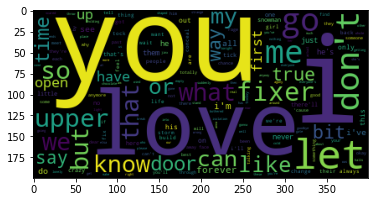

In [95]:
from wordcloud import WordCloud
# word_dict 를 이용해 wordcloud 만들기
# 코드 작성
wordcloud = WordCloud().generate_from_frequencies(word_dict)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)